In [1]:
import nibabel as nib
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.models import Model
from keras import optimizers
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers import Dropout
from keras.layers import Conv3D, MaxPooling3D
import numpy as np

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **`T1 Analysis `**

In [0]:
img_T1 = nib.load("/content/gdrive/My Drive/Radiology/T1.tpl.nii")

In [0]:
img_T1.shape

(193, 229, 193)

In [0]:
img_T1 = img_T1.get_fdata()

In [0]:
img_T1.shape

(193, 229, 193)

In [0]:
type(img_T1)

numpy.memmap

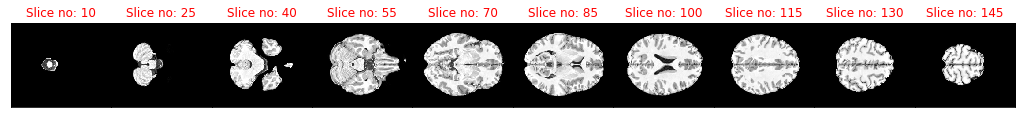

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=[18, 3])

n = 0
slice = 10
for _ in range(10):
    ax[n].imshow(img_T1[:, :, slice], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice no: {}'.format(slice), color='r')
    n += 1
    slice += 15
   
    fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

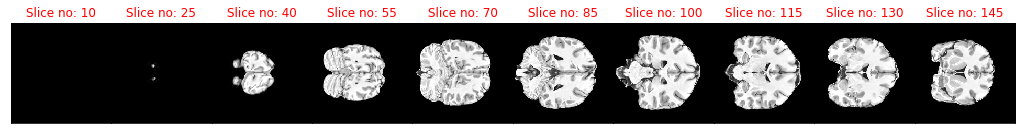

In [0]:

fig, ax = plt.subplots(1, 10, figsize=[18, 3])

n = 0
slice = 10
for _ in range(10):
    ax[n].imshow(img_T1[:, slice, :], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice no: {}'.format(slice), color='r')
    n += 1
    slice += 15
   
    fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

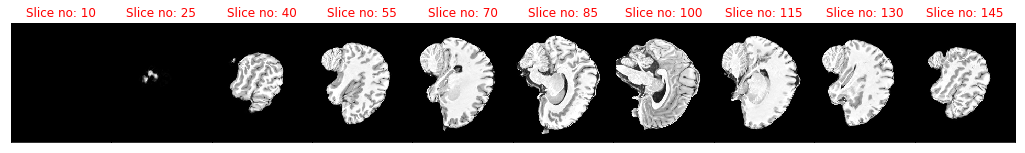

In [0]:

fig, ax = plt.subplots(1, 10, figsize=[18, 3])

n = 0
slice = 10
for _ in range(10):
    ax[n].imshow(img_T1[slice, :, :], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice no: {}'.format(slice), color='r')
    n += 1
    slice += 15
   
    fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

# **`DTI Analysis `**

In [2]:
img = nib.load("/content/gdrive/My Drive/Radiology/fa.tpl.nii")
img.shape

(193, 229, 193)

In [3]:
data = img.get_fdata()
data.shape


(193, 229, 193)

In [4]:
type(data)

numpy.memmap

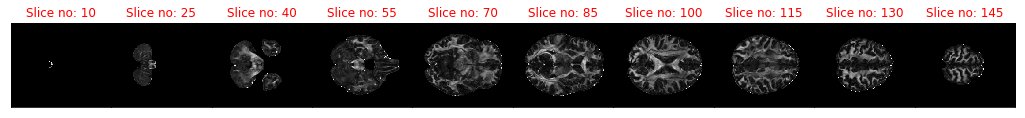

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=[18, 3])

n = 0
slice = 10
for _ in range(10):
    ax[n].imshow(data[:, :, slice], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice no: {}'.format(slice), color='r')
    n += 1
    slice += 15
   
    fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

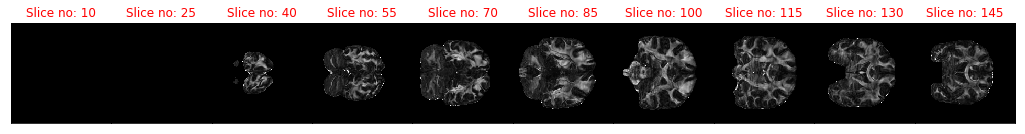

In [6]:

fig, ax = plt.subplots(1, 10, figsize=[18, 3])

n = 0
slice = 10
for _ in range(10):
    ax[n].imshow(data[:, slice, :], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice no: {}'.format(slice), color='r')
    n += 1
    slice += 15
   
    fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

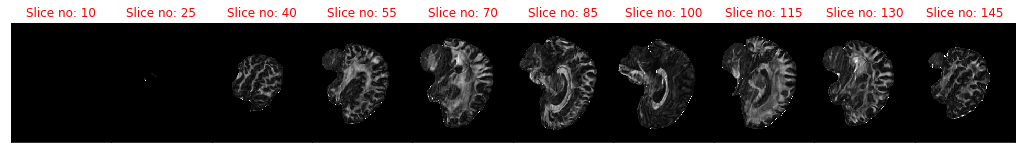

In [7]:

fig, ax = plt.subplots(1, 10, figsize=[18, 3])

n = 0
slice = 10
for _ in range(10):
    ax[n].imshow(data[slice, :, :], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice no: {}'.format(slice), color='r')
    n += 1
    slice += 15
   
    fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

# ***CNN Architecture (Individual)***

**T1 image **

In [0]:
X_train = img_T1.reshape(1,193, 229, 193,1)
from numpy import array

#Dummy Y
y_train = keras.utils.to_categorical(np.random.randint(3, size=(1, 1)), num_classes=3)


In [0]:
X_train.shape

(1, 193, 229, 193, 1)

In [0]:

def build_model():
  
  model = Sequential()
  model.add(Conv3D(32, kernel_size=(5,5,5), strides=(1, 1, 1), input_shape=(193, 229, 193,1)))
  model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=None, padding='valid', data_format=None))
  model.add(Conv3D(32, kernel_size=(5,5,5), strides=(1, 1, 1)))
  model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=None, padding='valid', data_format=None))
  model.add(Conv3D(32, kernel_size=(5,5,5), strides=(1, 1, 1)))
  model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=None, padding='valid', data_format=None))
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(3, activation='softmax'))

  return model

model = build_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3,batch_size=1)

Epoch 1/3
1/1 [==============================] - 4s 4s/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 2/3
1/1 [==============================] - 1s 803ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 3/3
1/1 [==============================] - 1s 809ms/step - loss: 1.1921e-07 - acc: 1.0000


**DTI image**

In [0]:
X_train = data.reshape(1,193, 229, 193,1)
from numpy import array

#Dummy Y
y_train = keras.utils.to_categorical(np.random.randint(3, size=(1, 1)), num_classes=3)


In [9]:

def build_model():
  
  model = Sequential()
  model.add(Conv3D(32, kernel_size=(5,5,5), strides=(1, 1, 1), input_shape=(193, 229, 193,1)))
  model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=None, padding='valid', data_format=None))
  model.add(Conv3D(32, kernel_size=(5,5,5), strides=(1, 1, 1)))
  model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=None, padding='valid', data_format=None))
  model.add(Conv3D(32, kernel_size=(5,5,5), strides=(1, 1, 1)))
  model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=None, padding='valid', data_format=None))
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(3, activation='softmax'))

  return model

model = build_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3,batch_size=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
1/1 [==============================] - 20s 20s/step - loss: 1.0827 - acc: 0.0000e+00
Epoch 2/3
1/1 [==============================] - 1s 839ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 3/3
1/1 [==============================] - 1s 804ms/step - loss: 1.1921e-07 - acc: 1.0000
